# **CLASE 9: Introducción a Redes Neuronales y Deep Learning**

## Instalamos librerías necesarias

In [12]:
!pip install easyocr
!pip install opencv-python
!pip install transformers

In [13]:
import easyocr
import cv2

## 👁️ **Parte 1: El Ojo de la IA - Extracción de Datos de Albaranes**
* **Objetivo:** Convertir una imagen física (albarán) en datos de texto para el ERP.

### Inicializar lector (español e inglés)

In [14]:
reader = easyocr.Reader(['es', 'en'])

### Se carga un alabarán de ejemplo de Internet

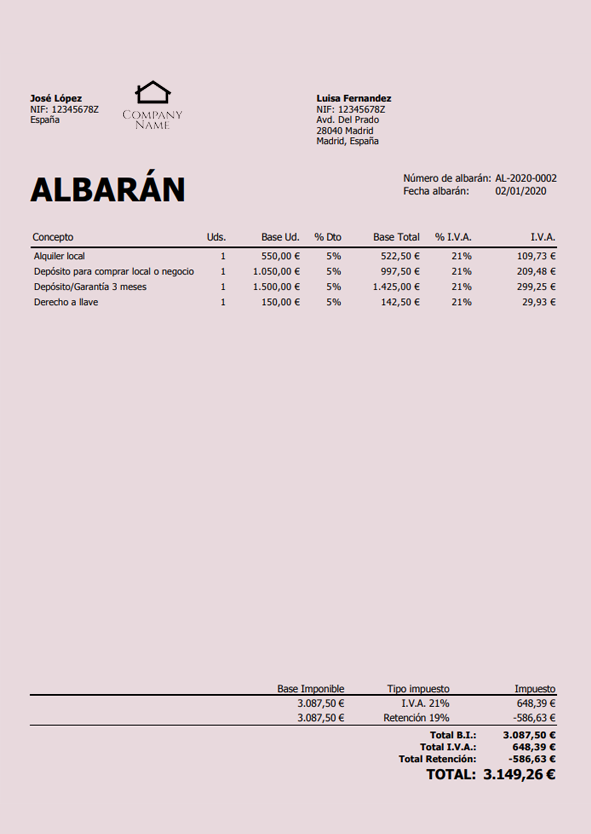

In [15]:
from IPython.display import Image, display

display(Image('/content/alb1.png'))

### Se efectúa la lectura del albarán

In [16]:
results = reader.readtext('/content/alb1.png')

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


### Se visualizan los primeros 4 resultados
### Texto y coordenadas del texto

In [17]:
results[0:5]

[([[np.int32(30), np.int32(94)],
   [np.int32(82), np.int32(94)],
   [np.int32(82), np.int32(102)],
   [np.int32(30), np.int32(102)]],
  'Jose Lopnr',
  np.float64(0.11293983006187228)),
 ([[np.int32(315), np.int32(93)],
   [np.int32(393), np.int32(93)],
   [np.int32(393), np.int32(105)],
   [np.int32(315), np.int32(105)]],
  'Luisa Fernandez',
  np.float64(0.6944918536884556)),
 ([[np.int32(29), np.int32(103)],
   [np.int32(103), np.int32(103)],
   [np.int32(103), np.int32(117)],
   [np.int32(29), np.int32(117)]],
  'NIF: 12345678z',
  np.float64(0.6022642115071992)),
 ([[np.int32(337), np.int32(103)],
   [np.int32(389), np.int32(103)],
   [np.int32(389), np.int32(117)],
   [np.int32(337), np.int32(117)]],
  '12345678z',
  np.float64(0.6923302056294152)),
 ([[np.int32(29), np.int32(115)],
   [np.int32(63), np.int32(115)],
   [np.int32(63), np.int32(127)],
   [np.int32(29), np.int32(127)]],
  'Espana',
  np.float64(0.68986393380215))]

### Mostrar resultados
### Texto y probabilidades del nivel de confianza

In [18]:

for (bbox, text, confidence) in results:
    print(f"Texto: {text} - Confianza: {confidence:.2f}")

Texto: Jose Lopnr - Confianza: 0.11
Texto: Luisa Fernandez - Confianza: 0.69
Texto: NIF: 12345678z - Confianza: 0.60
Texto: 12345678z - Confianza: 0.69
Texto: Espana - Confianza: 0.69
Texto: Company - Confianza: 0.39
Texto: Avd. Del Prado - Confianza: 0.61
Texto: Naate - Confianza: 0.11
Texto: 28040 Hadrid - Confianza: 0.70
Texto: Mador - Confianza: 0.24
Texto: Esoana - Confianza: 0.24
Texto: Numero de albaran: AL-2020-0002 - Confianza: 0.70
Texto: ALBARÁN - Confianza: 1.00
Texto: Fecha albarán: - Confianza: 0.99
Texto: 02/01/2020 - Confianza: 0.94
Texto: Concepto - Confianza: 1.00
Texto: Base Total - Confianza: 1.00
Texto: IVA - Confianza: 0.50
Texto: Aquiler local - Confianza: 0.50
Texto: 550,00 - Confianza: 1.00
Texto: 522,50 - Confianza: 1.00
Texto: 2196 - Confianza: 0.67
Texto: 109,73 - Confianza: 0.60
Texto: Deposito para comprar local - Confianza: 0.57
Texto: neoocio - Confianza: 0.78
Texto: 1.050,00 € - Confianza: 0.68
Texto: 997,50 € - Confianza: 1.00
Texto: 2196 - Confianza: 

### Visualizar texto a partir de coordenadas

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def visualize_ocr_bbox(image_path, bbox_coords):
    """Visualiza bounding box de OCR en la imagen"""

    # Leer imagen
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convertir coordenadas a formato numpy
    bbox = np.array(bbox_coords, dtype=np.int32)

    # Crear figura
    plt.figure(figsize=(12, 8))

    # Dibujar bounding box
    cv2.polylines(image_rgb, [bbox], True, (0, 255, 0), 2)  # Verde, grosor 2

    # Mostrar imagen
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f'Bounding Box OCR - {len(bbox_coords)} puntos')

    # Añadir anotación con coordenadas
    bbox_text = "Coordenadas:\n" + "\n".join([f"({x}, {y})" for x, y in bbox])
    plt.text(10, 30, bbox_text, fontsize=10, color='white',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="black", alpha=0.7))

    plt.show()

    return image_rgb



### Visualizando coordenadas de texto en imagen (primeros 4)

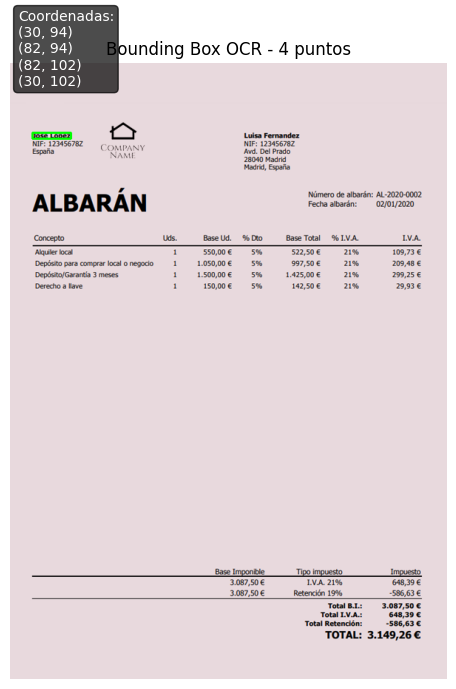

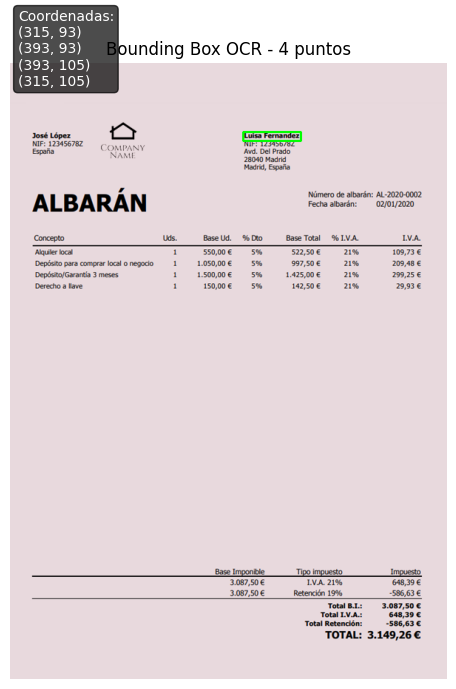

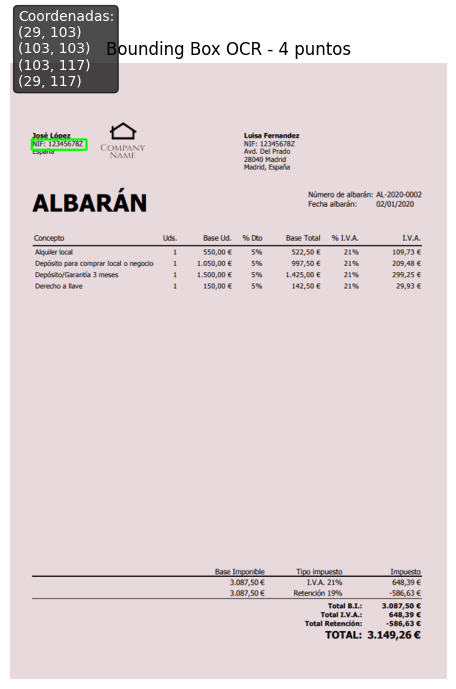

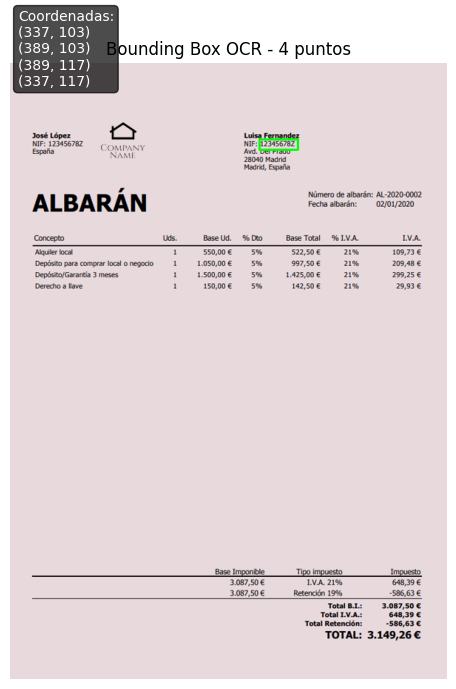

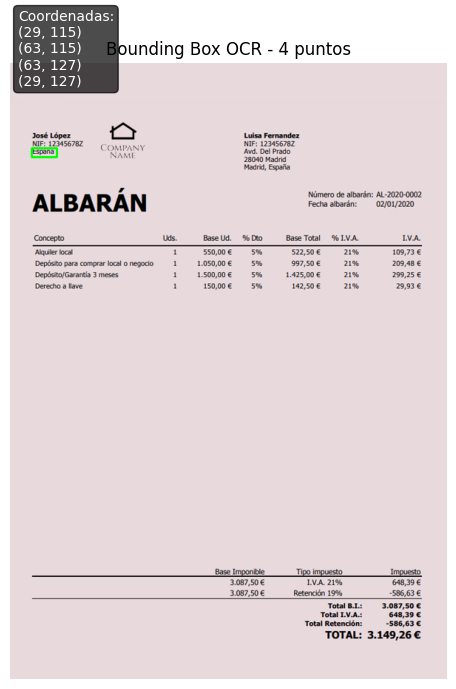

In [20]:
for i in results[0:5]:
    visualize_ocr_bbox('alb1.png', i[0])


## 🧠 **Parte 2: El Cerebro de la IA - Triaje Automático de Soporte**
**Objetivo:** Clasificar la urgencia de los mensajes según el sentimiento del cliente.

In [21]:
from transformers import pipeline

# Usamos DistilBERT, un modelo de clasificación de texto ligero y rápido
classifier = pipeline(
    "text-classification",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [23]:
# Ticket de soporte de ejemplo
texto_ticket = "¿Dónde está mi pedido 45678? ¡Se suponía que llegaría ayer! Es una emergencia, necesito una respuesta ya."

# Ejecutar la clasificación
# El modelo base clasifica en 'POSITIVO' o 'NEGATIVO', simularemos la priorización
resultado = classifier(texto_ticket)[0]

# Mapeo a categorías logísticas (se requiere un fine-tuning real para esto)
if resultado['label'] == 'NEGATIVE' and resultado['score'] > 0.8:
    prioridad = "URGENTE - Seguimiento de Entrega"
else:
    prioridad = "Baja - Consulta General"

print(f"Texto de entrada: '{texto_ticket}'")
print("-" * 30)
print(f"Clasificación del Modelo: {resultado['label']} (Confianza: {resultado['score']:.2f})")
print(f"Prioridad Logística Asignada: {prioridad}")

Texto de entrada: '¿Dónde está mi pedido 45678? ¡Se suponía que llegaría ayer! Es una emergencia, necesito una respuesta ya.'
------------------------------
Clasificación del Modelo: NEGATIVE (Confianza: 0.84)
Prioridad Logística Asignada: URGENTE - Seguimiento de Entrega
